## Title

# Customer Subscription Prediction with Decision Trees

# Table of Contents

1. **Title**  
2. **Problem Statement**  
3. **Objective**  
4. **Importing Necessary Libraries**  
5. **Data Collection**  
6. **Data Description**  
7. **EDA (Exploratory Data Analysis)**  
   - Identify Numerical and Categorical Columns  
   - Checking for Null Values  
   - Checking for Duplicates  
   - Understand the Distribution of Data  
     - Descriptive Statistics  
     - Plot Distributions of Numerical Features  
     - Boxplots to Spot Outliers  
     - Check Skewness and Kurtosis  
     - Age Distribution  
     - Distribution of Occupation  
     - Distribution of Marital Status  
     - Distribution of Education Status  
     - Credit Defaults  
     - Housing Loan  
     - Personal Loan  
     - Outcome (Term Deposits)  
8. **Data Preprocessing**  
   - Handling Outliers  
9. **Feature Engineering**  
   - Label Encoding Categorical Features  
   - Feature Scaling   
10. **Data Splitting**  
11. **Training Decision Tree**  
12. **Model Evaluation**  
13. **Feature Selection**  
14. **Hyperparameter Tuning**  
15. **Final Model Evaluation**  
16. **Visualizing the Tree**  
17. **Result**  
18. **Conclusion**


## Problem Statement
##### The dataset contains information about a direct marketing campaign of a Portuguese banking institution. The classification task is to predict whether a client will subscribe to a term deposit based on demographic and behavioral attributes.



##  Objective
##### Perform Exploratory Data Analysis (EDA) to understand the distribution of features and relationships with the target variable.

##### Encode categorical variables and scale numerical features for modeling.

##### Build a Decision Tree Classifier to predict client subscription (y).

##### Apply feature selection and hyperparameter tuning to improve model performance.

##### Evaluate the model using accuracy, classification report, and confusion matrix.

## Importing necessary libraries  

In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [3]:
#Loading data
df=pd.read_csv("bank-full.csv",sep=';')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Description

##### Dataset : https://archive.ics.uci.edu/ml/datasets/bank+marketing

## EDA (Exploratory Data Analysis)

In [5]:
df.shape

(45211, 17)

##### There are 45211 rows and 17 columns in the dataset.

In [6]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Identify numerical and categorical columns

In [7]:
#columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# Numerical columns
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [9]:
#categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols )

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


##### Out of 17 columns, 10 are categorical and 7 are numerical

### Checking for null values

In [10]:
#Checking Missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking for Duplicates

In [11]:
#Checking for duplicates
df.duplicated().sum()

0

## Understand the distribution of data

#### 1. Check Descriptive Statistics

In [12]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [13]:
df.describe(include="object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


#### 2. Plot Distributions of Numerical Features

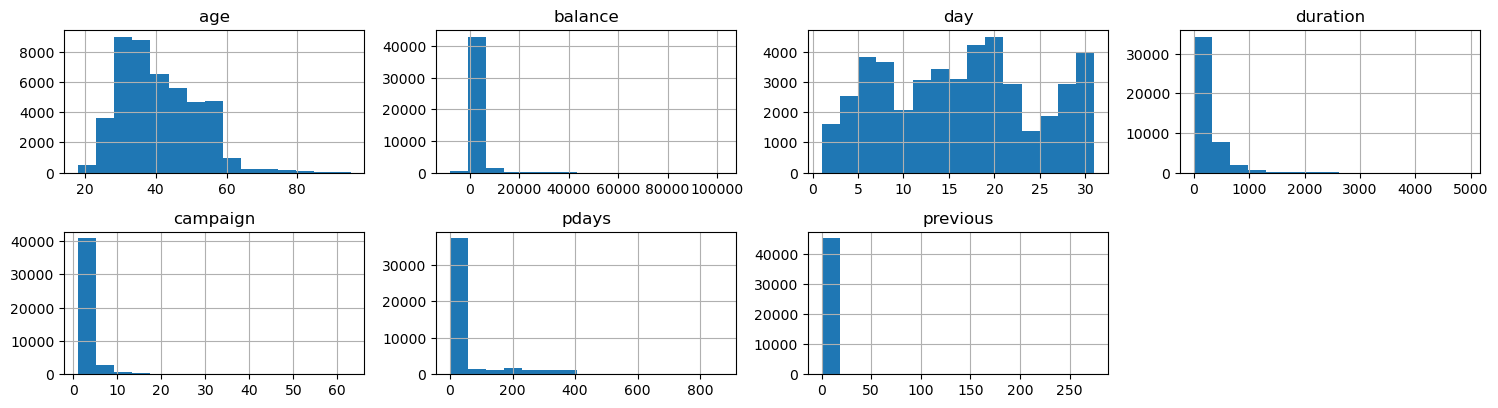

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()


#### 3. Boxplots to Spot Outliers

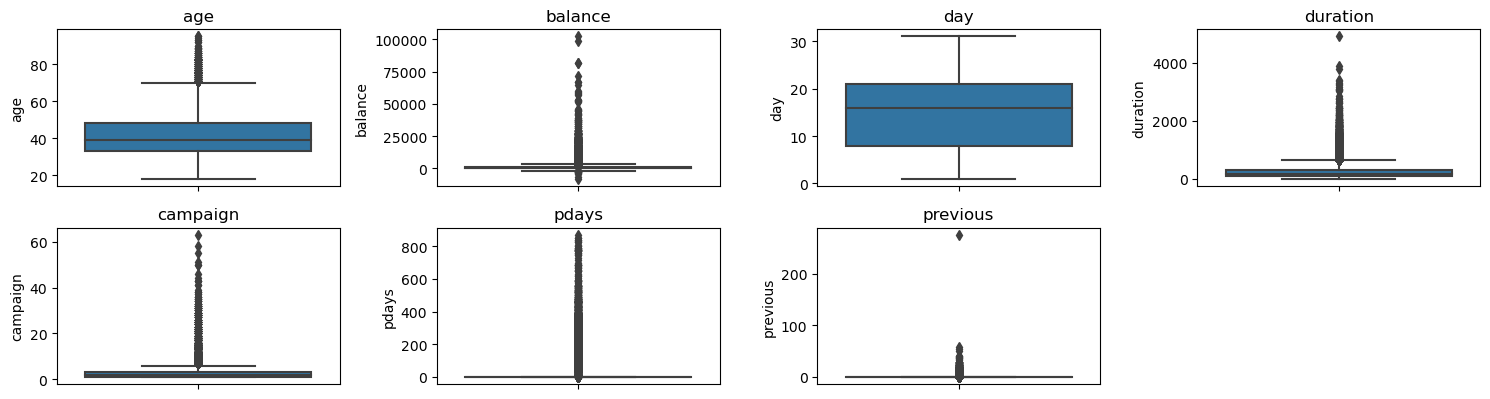

In [15]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

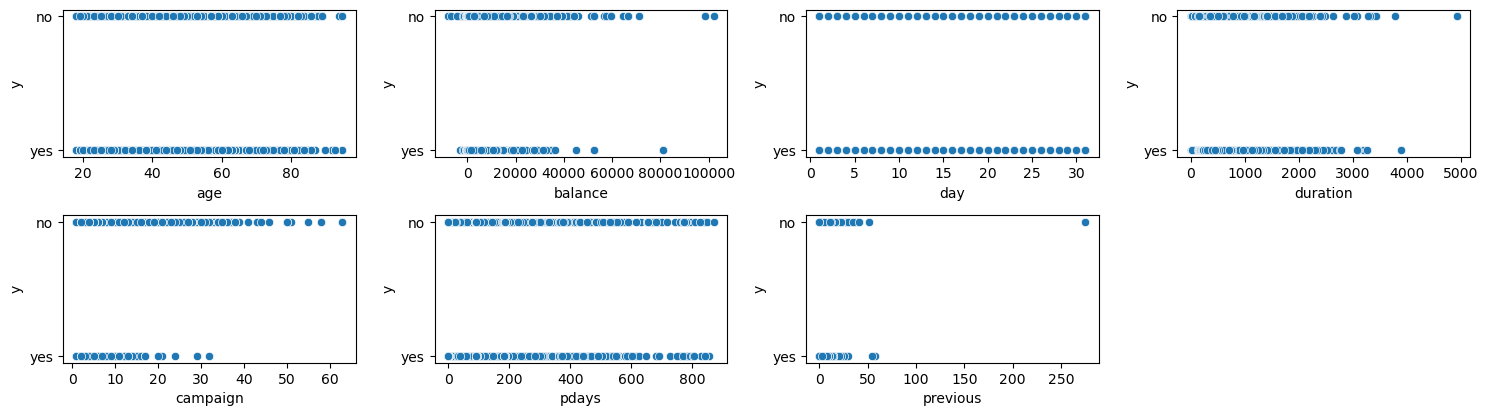

In [16]:
# scatter plot to identify the relationship between dependent and independent features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='y')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### 4. Check Skewness and Kurtosis

In [17]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurt = df[num_cols].apply(lambda x: kurtosis(x, fisher=False))

print(skewness)
print(kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

age          0.684795
balance      8.360031
day          0.093076
duration     3.144214
campaign     4.898488
pdays        2.615629
previous    41.845066
dtype: float64
age            3.319402
balance      143.735848
day            1.940087
duration      21.151775
campaign      42.245178
pdays          9.934296
previous    4509.362118
dtype: float64
Variables with positive skewness (skew > 1):
 balance      8.360031
duration     3.144214
campaign     4.898488
pdays        2.615629
previous    41.845066
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 day    1.940087
dtype: float64
Variables with leptokurtic distribution (kurtosis > 3):
 age            3.319402
balance      143.735848
duration      21.151775
campaign      42.245178
pdays          9.934296
previous    4509.362118
dtype: float64


<Axes: >

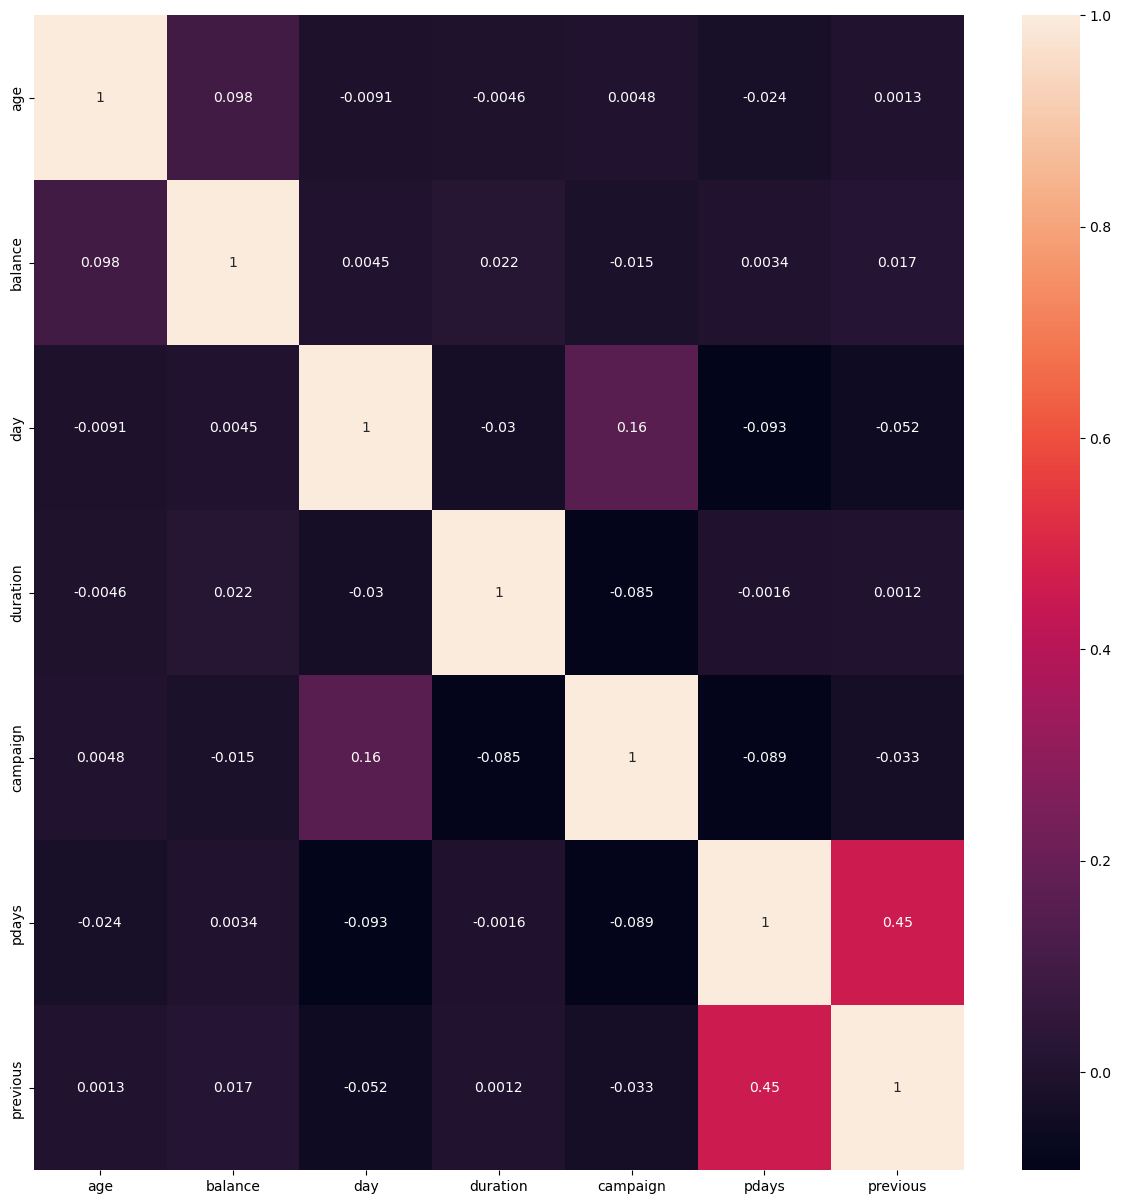

In [18]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True)

#### Age Distribution

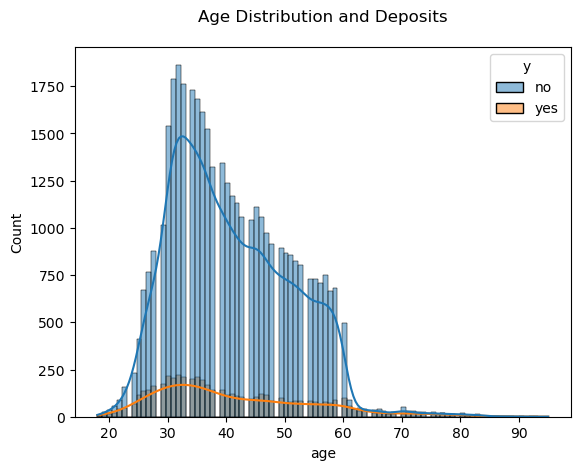

In [19]:
sns.histplot(x="age", data=df, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()


##### Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.

##### Distribution of Occupation

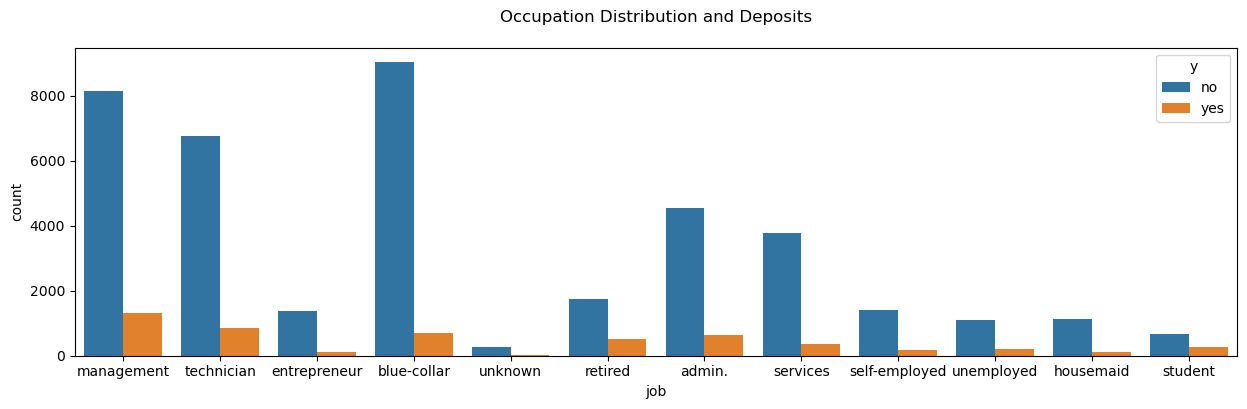

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= df, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

#### Majority of clients have occupation "blue-collar", "management" or "Technician" and maximum clients subscribing to Term Deposit also are from these occupation.

### Distribution of Marital Status

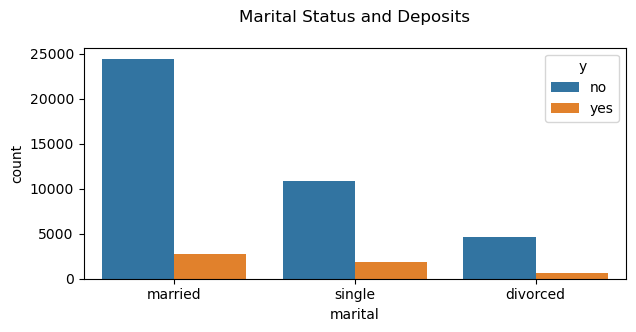

In [21]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= df, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

#### Clients are mostly married

## Distribution of Education Status

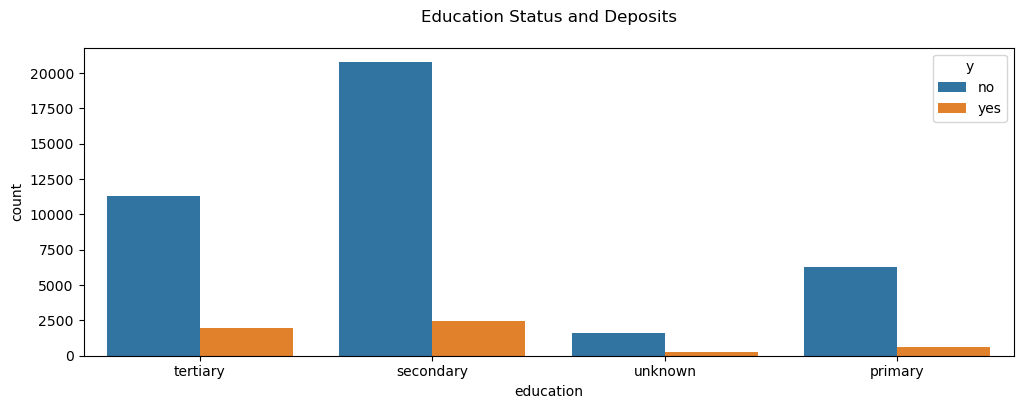

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data=df, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

#### Most of the clients have secondary and tertary Education status

## Credit defaults 

In [23]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

#### Majority of clients do not have any Credit defaults. Only 815 clients have Credit default

### Distribution of Housing Loan

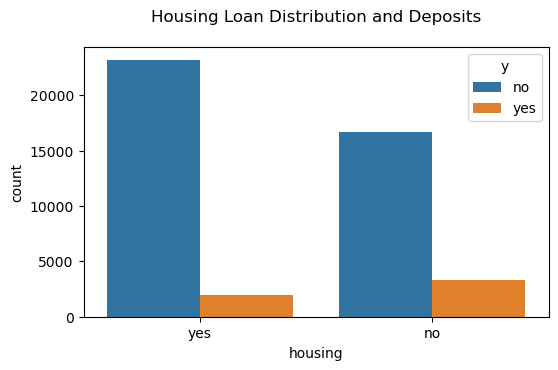

In [24]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= df, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

#### mostly have Home loan

### Distribution of Personal Loan

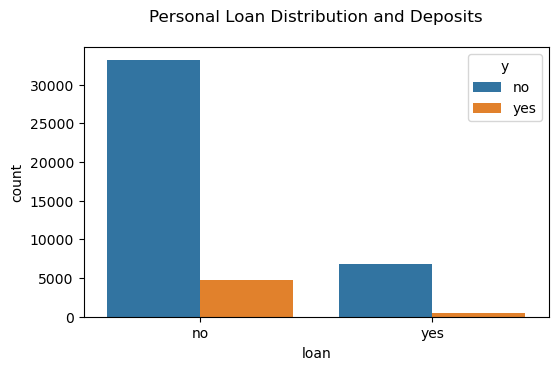

In [25]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= df, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

#### Most of the Clients subscribing to Term Deposits dont have personal loan

### Distribution of Outcome (Term Deposits)


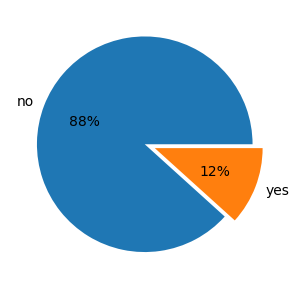

In [26]:
#Count of Outcome
df.y.value_counts()
keys = df.y.value_counts().index
data = df.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

##### 12% of clients have subscribed to Term Deposit

## Data Preprocessing

#### Handling Outliers

In [27]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [28]:
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

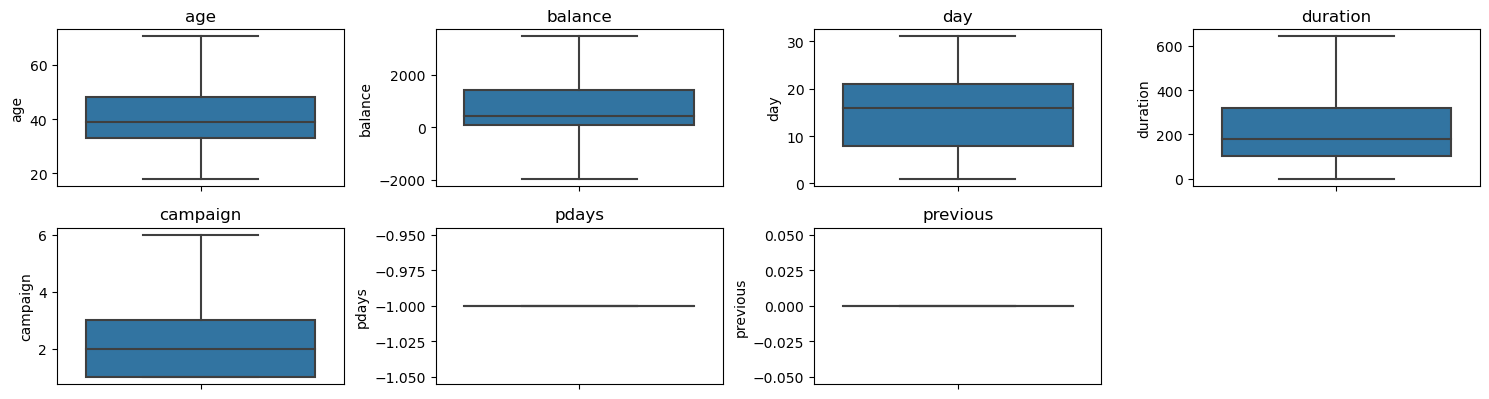

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
#box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = df[numeric_columns].apply(skew)
kurt = df[numeric_columns].apply(lambda x: kurtosis(x, fisher=False))

print(skewness)
print(kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

age         0.529697
balance     1.097766
day         0.093076
duration    1.037539
campaign    1.099079
pdays            NaN
previous         NaN
dtype: float64
age         2.623928
balance     3.007541
day         1.940087
duration    3.107420
campaign    3.070162
pdays            NaN
previous         NaN
dtype: float64
Variables with positive skewness (skew > 1):
 balance     1.097766
duration    1.037539
campaign    1.099079
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 age    2.623928
day    1.940087
dtype: float64
Variables with leptokurtic distribution (kurtosis > 3):
 balance     3.007541
duration    3.107420
campaign    3.070162
dtype: float64


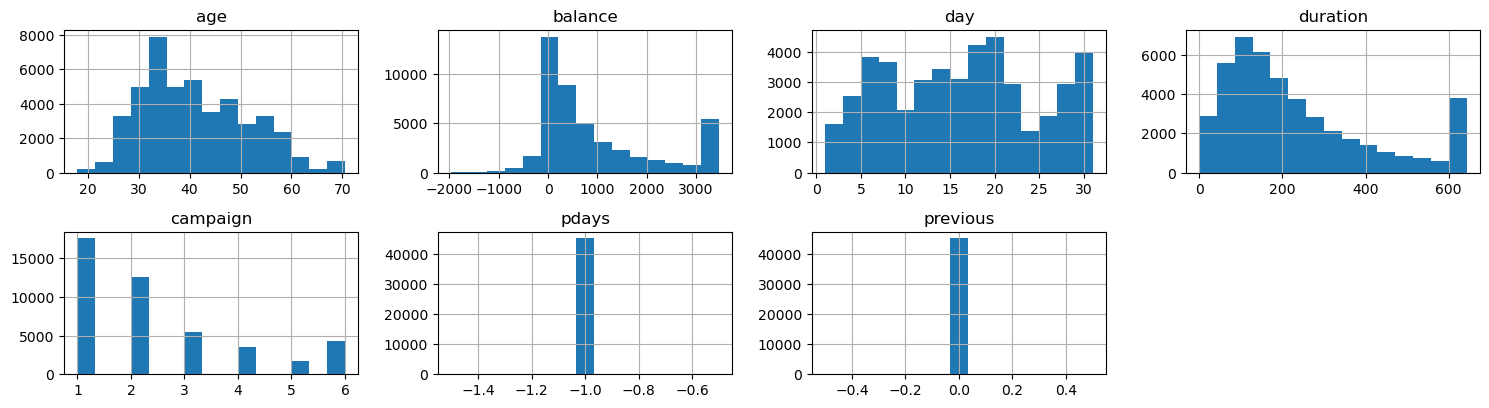

In [31]:
# Histograms for numerical columns after outlier treatment
df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

## Feature Engineering

### Label Encoding for Categorical Variables

In [32]:
# Identify all categorical columns (dtype = 'object')
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store encoders if needed later
encoders = {}

# Apply LabelEncoder to each column individually
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # store encoder for possible inverse transform


In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4,1,2,0,2143.0,1,0,2,5.0,8,261.0,1.0,-1.0,0.0,3,0
1,44.0,9,2,1,0,29.0,1,0,2,5.0,8,151.0,1.0,-1.0,0.0,3,0
2,33.0,2,1,1,0,2.0,1,1,2,5.0,8,76.0,1.0,-1.0,0.0,3,0
3,47.0,1,1,3,0,1506.0,1,0,2,5.0,8,92.0,1.0,-1.0,0.0,3,0
4,33.0,11,2,3,0,1.0,0,0,2,5.0,8,198.0,1.0,-1.0,0.0,3,0


In [35]:
#Splitting input and output
X = df.drop("y", axis=1)
y = df.y

### Feature Scaling with StandardScaler

In [36]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

#  Fit the scaler on the feature set and transform it
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#  Preview the scaled features
X_scaled.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.648117,-0.103820,-0.275762,1.036362,-0.13549,1.027653,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.147445,-0.870092,0.0,0.0,0.444898
1,0.301287,1.424008,1.368372,-0.300556,-0.13549,-0.768817,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.474910,-0.870092,0.0,0.0,0.444898
2,-0.756936,-0.714951,-0.275762,-0.300556,-0.13549,-0.791761,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.899243,-0.870092,0.0,0.0,0.444898
3,0.589894,-1.020516,-0.275762,2.373280,-0.13549,0.486333,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.808718,-0.870092,0.0,0.0,0.444898
4,-0.756936,2.035139,1.368372,2.373280,-0.13549,-0.792611,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.208994,-0.870092,0.0,0.0,0.444898


## Data Splitting

In [37]:
#Train-test split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.3)

##  Training Decision Tree

In [38]:
# Training Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##   Model Evaluatio

 Training Accuracy: 1.0
 Testing Accuracy : 0.8652

 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11918
           1       0.45      0.47      0.46      1646

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



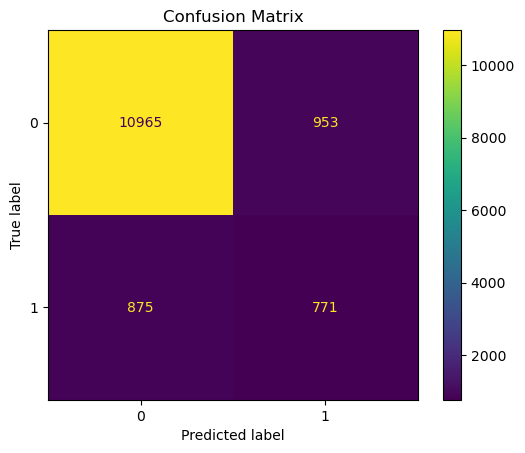

In [39]:
#  Model Evaluation

# Predict on training and testing data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print(" Training Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
print(" Testing Accuracy :", round(accuracy_score(y_test, y_test_pred), 4))

#  Print classification report for test set
print("\n Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

#  Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()


##  Feature Selection (Using Random Forest)

In [40]:
#  Feature Selection using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
selector_model = RandomForestClassifier(random_state=42)
selector_model.fit(X_train, y_train)

sfm = SelectFromModel(selector_model, threshold="median", prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

## Hyperparameter tunning

In [41]:
#  Hyperparameter Tuning with GridSearchCV
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_selected, y_train)
best_dt = grid_search.best_estimator_

## Final Model Evaluation

Train Accuracy: 0.9024
Test Accuracy: 0.8929

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11918
           1       0.61      0.34      0.43      1646

    accuracy                           0.89     13564
   macro avg       0.76      0.65      0.69     13564
weighted avg       0.88      0.89      0.88     13564



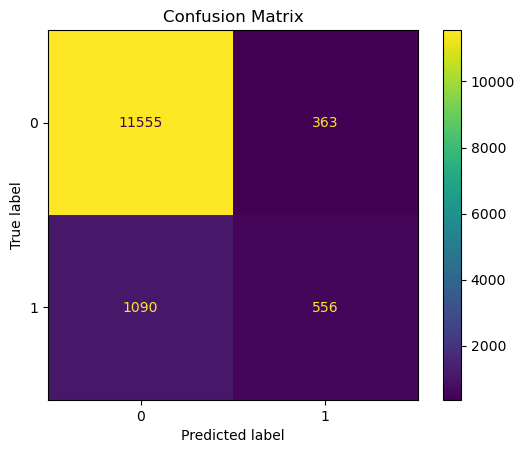

In [42]:
#  Model Evaluation
y_train_pred = best_dt.predict(X_train_selected)
y_test_pred = best_dt.predict(X_test_selected)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", round(train_acc, 4))
print("Test Accuracy:", round(test_acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

## Visualizing the Tree

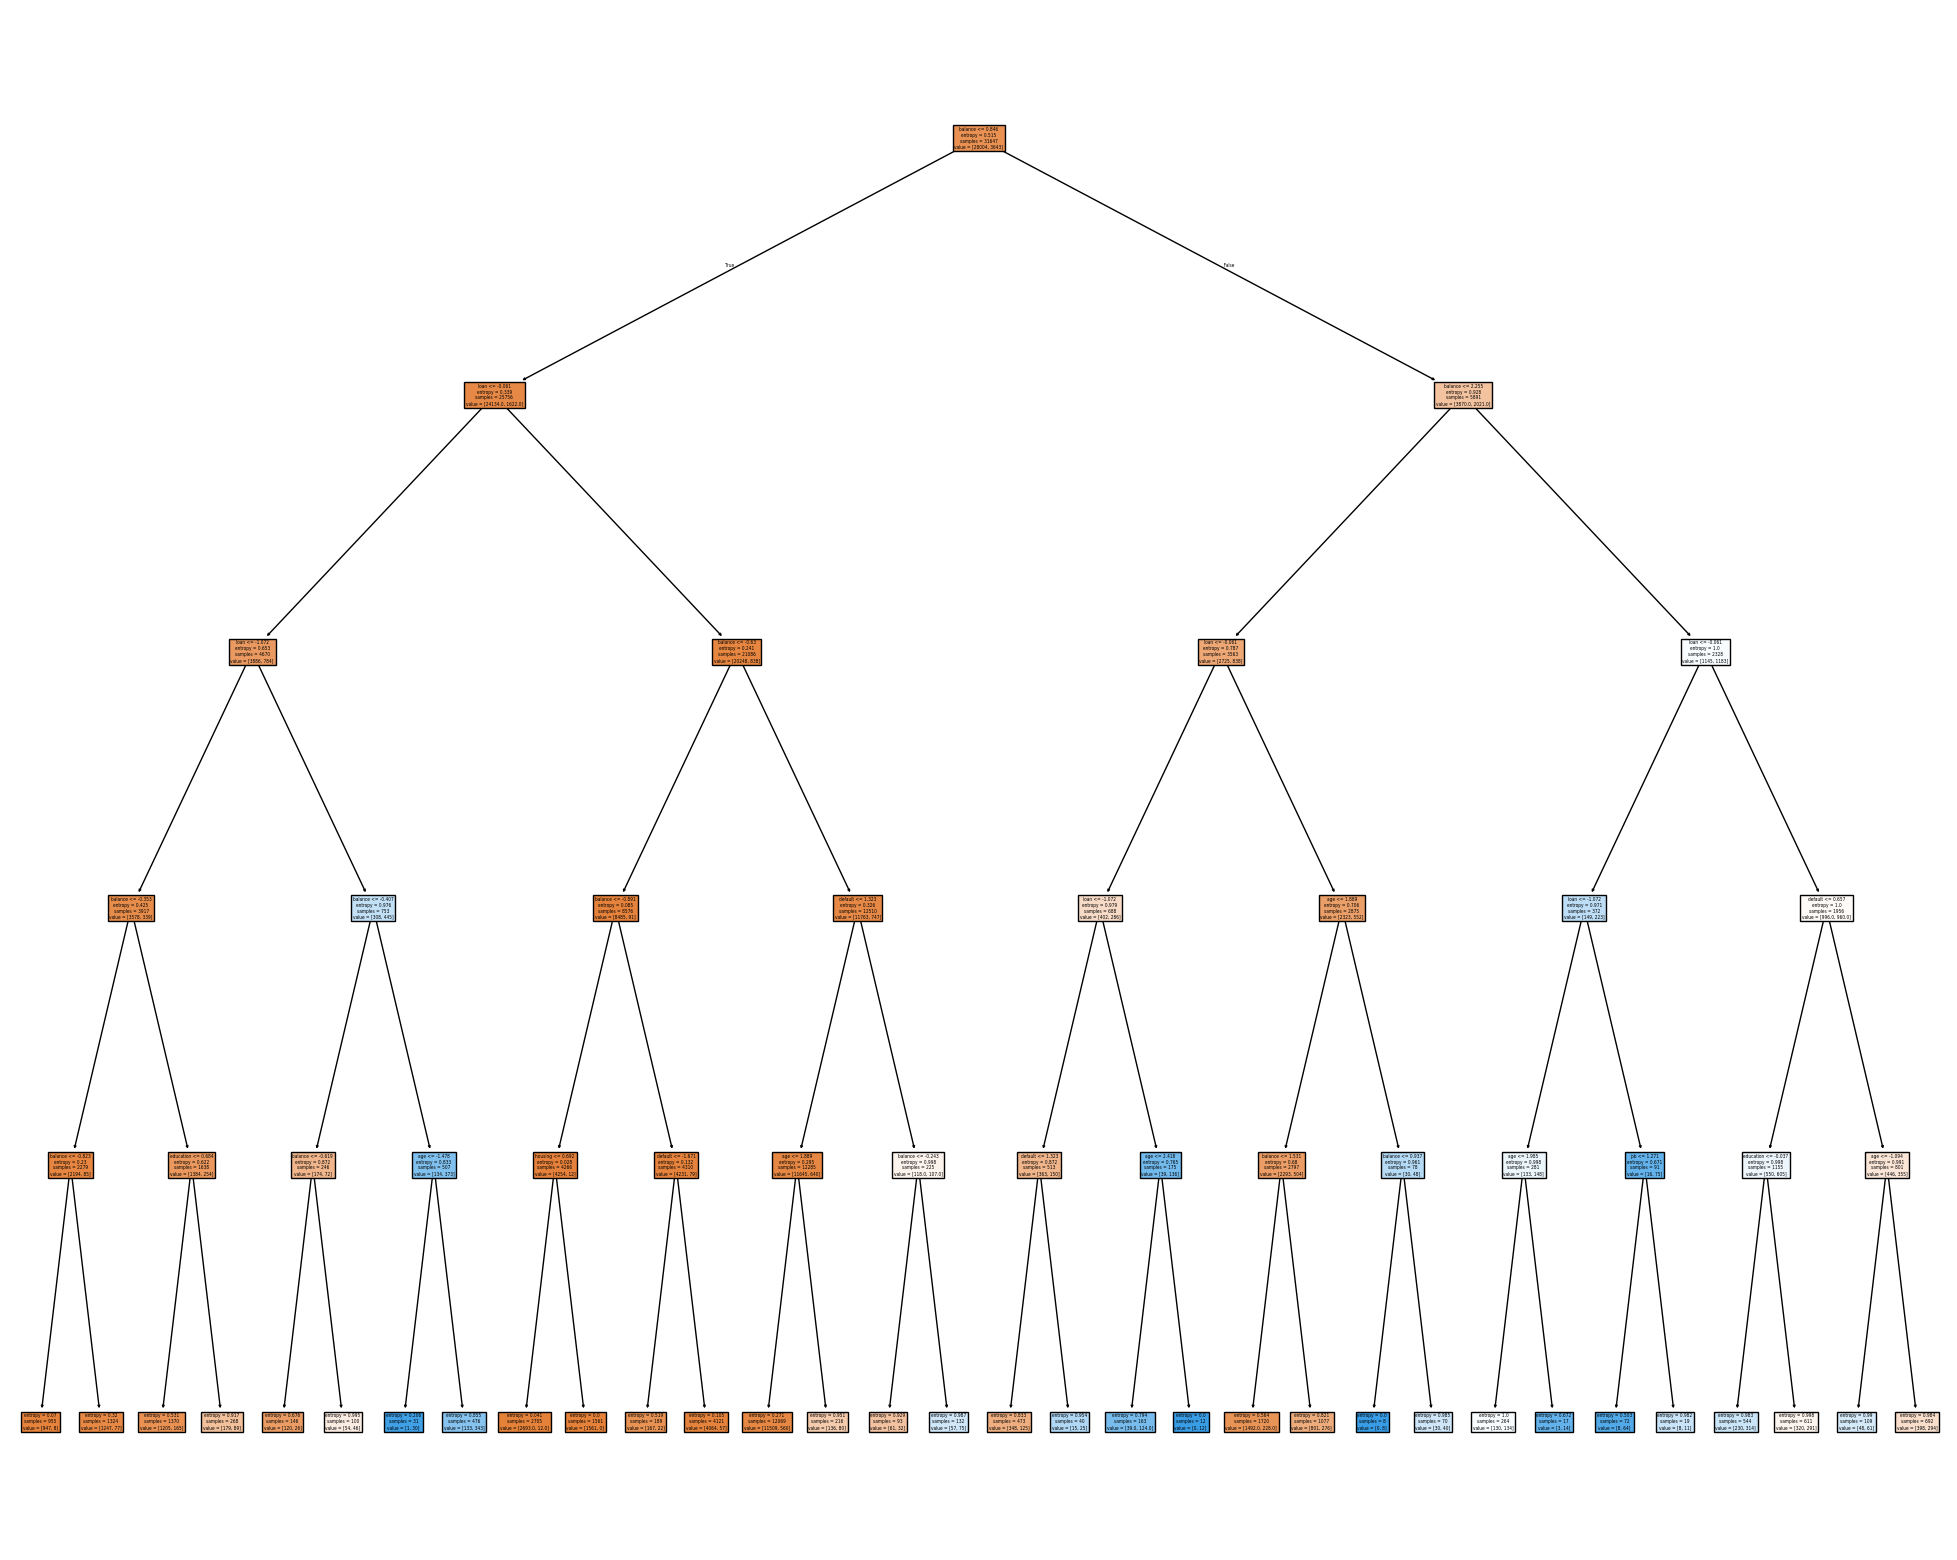

In [43]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(best_dt,filled=True,feature_names=X.columns)

## Result
##### The best Decision Tree model was obtained after feature selection and hyperparameter tuning.

##### Training Accuracy:  0.8975

##### Testing Accuracy: 0.8984

## Conclusion
##### The Decision Tree Classifier effectively predicted customer subscription to term deposits with high accuracy after tuning and feature selection.Further improvements can be explored by comparing with ensemble models like Random Forest or XGBoost.